(-0.5, 412.5, 412.5, -0.5)

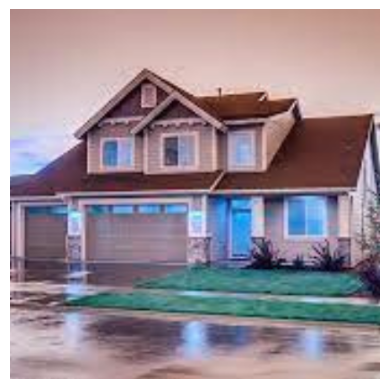

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

im_bgr=cv2.imread('/home/dmacs/Desktop/MTech/104P/pic1.png')  #will be in bgr

plt.imshow(im_bgr)
plt.axis('off')


(-0.5, 412.5, 412.5, -0.5)

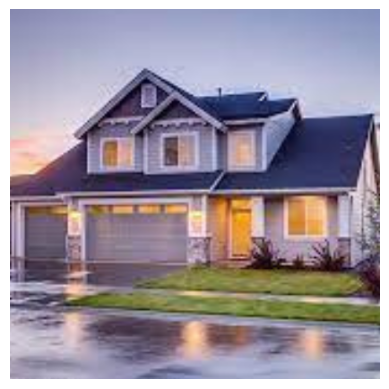

In [16]:
im=cv2.cvtColor(im_bgr,cv2.COLOR_BGR2RGB)

plt.imshow(im)
plt.axis('off')

(-0.5, 412.5, 412.5, -0.5)

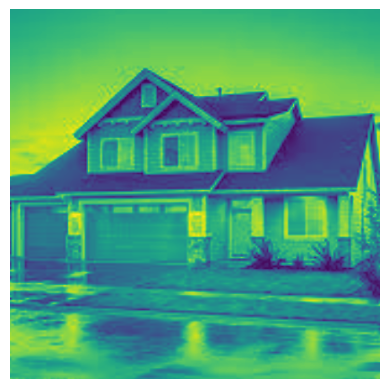

In [17]:
im_gray=cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)

plt.imshow(im_gray)
plt.axis('off')

(-0.5, 299.5, 299.5, -0.5)

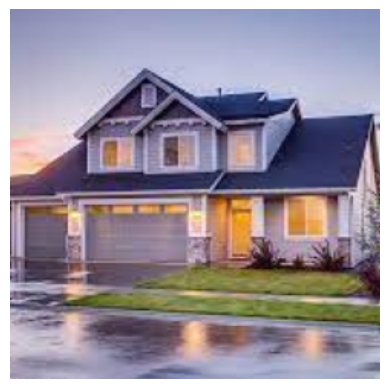

In [18]:
im_resize=cv2.resize(im,(300,300))

plt.imshow(im_resize)
plt.axis('off')

(-0.5, 412.5, 412.5, -0.5)

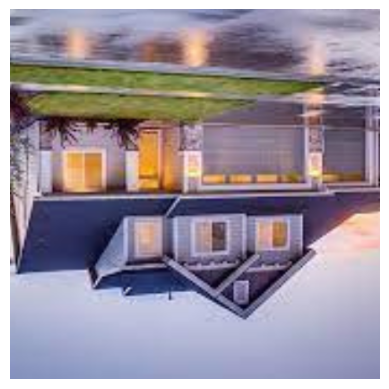

In [19]:
im_ro=cv2.rotate(im,cv2.ROTATE_180)

plt.imshow(im_ro)
plt.axis('off')

In [20]:
print(im.shape)

(413, 413, 3)


True

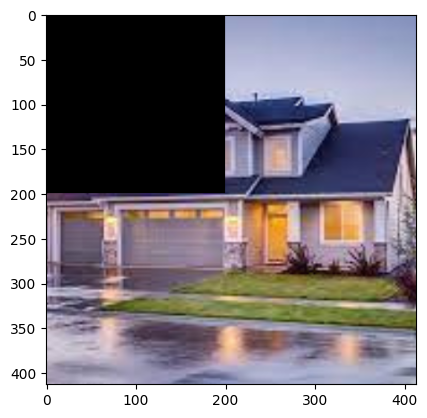

In [21]:
for i in range(1,200):
  for j in range(1,200):
    im[i][j]=[0,0,0]

plt.imshow(im)

cv2.imwrite('/home/dmacs/Desktop/MTech/104P/pi.png',im)


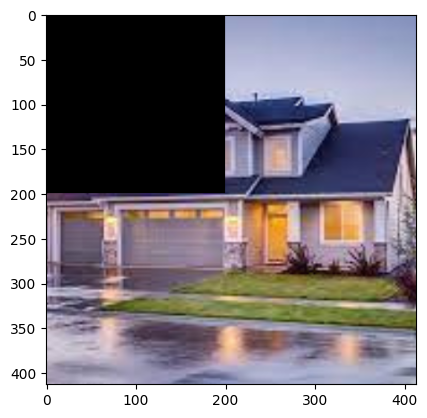

In [22]:
im2=cv2.imread('/home/dmacs/Desktop/MTech/104P/pi.png')

plt.imshow(im2)

[175 134 132]
[226 164 136]
[255 255 255]
[0 0 0]
[52  0  0]
[255   0   0]


(-0.5, 412.5, 412.5, -0.5)

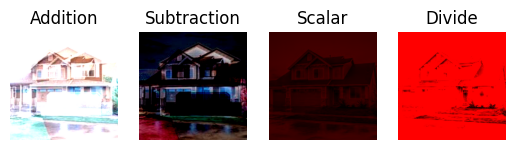

In [23]:
im1=cv2.imread('pic1.png')
im2=cv2.imread('pic2.png')

im_add=cv2.add(im1,im2)
im_sub=cv2.subtract(im1,im2)
im_scalar=cv2.multiply(im1,0.3)
im_divide=cv2.divide(im1,0.3)

print(im1[0][0])
print(im2[0][0])
print(im_add[0][0])
print(im_sub[0][0])
print(im_scalar[0][0])
print(im_divide[0][0])


plt.subplot(141)
plt.imshow(im_add)
plt.title('Addition')
plt.axis('off')

plt.subplot(142)
plt.imshow(im_sub)
plt.title('Subtraction')
plt.axis('off')

plt.subplot(143)
plt.imshow(im_scalar)
plt.title('Scalar')
plt.axis('off')

plt.subplot(144)
plt.imshow(im_divide)
plt.title('Divide')
plt.axis('off')


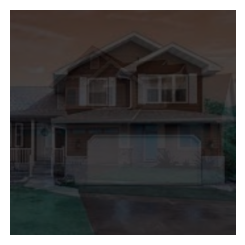

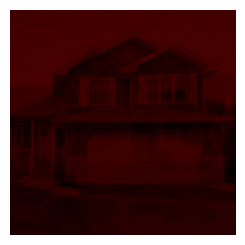

In [24]:

im_weight1=cv2.addWeighted(im1,0.1,im2,0.2,0)
im_weight2=cv2.add(cv2.multiply(im1,0.1),cv2.multiply(im2,0.2))

plt.subplot(121)
plt.imshow(im_weight1)
plt.axis('off')
plt.show()

plt.subplot(122)
plt.imshow(im_weight2)
plt.axis('off')
plt.show()


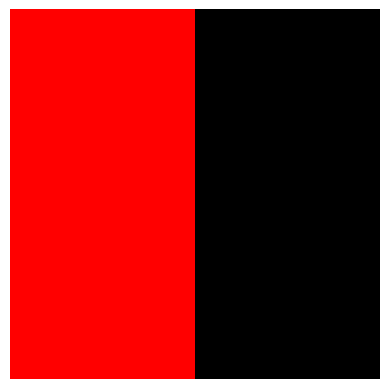

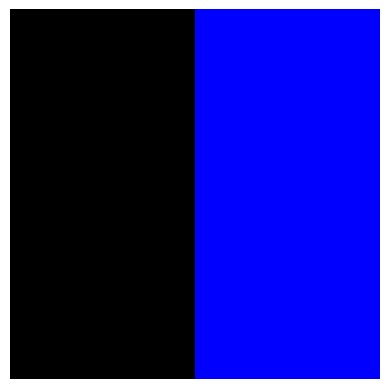

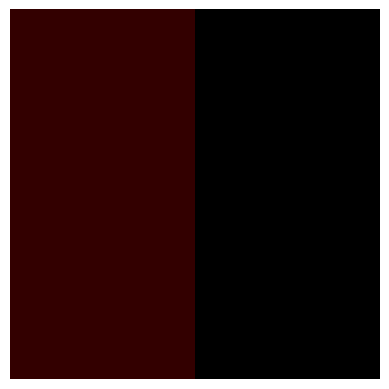

In [25]:
import numpy as np

im=np.zeros((100,100,3),dtype=np.uint8)
ima=np.zeros((100,100,3),dtype=np.uint8)

im[:,:50]=[255,0,0]
ima[:,50:]=[0,0,255]

plt.imshow(im)
plt.axis('off')
plt.show()

plt.imshow(ima)
plt.axis('off')
plt.show()

a = 0.2
b = 1 - a

im_max=np.maximum(cv2.multiply(im,0.2),cv2.multiply(ima,0.4))

plt.imshow(im_max)
plt.axis('off')
plt.show()



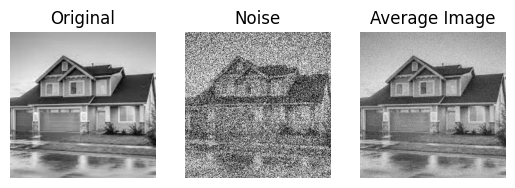

In [26]:
im1 = cv2.imread("pic1.png", cv2.IMREAD_GRAYSCALE)


def gen_noise(im, noise_level):
    noise = np.random.normal(0, noise_level, (413, 413))
    noise_image = im + noise
    noise_img = np.clip(noise_image, 0, 255).astype(np.uint8)
    return noise_img


def random_array(im1, number, noise_level):
    ar = []
    for _ in range(number + 1):
        im = gen_noise(im1, noise_level)
        ar.append(im)
    return ar


def avg_imag(ar):
    np_ar = np.array(ar)
    avg_img = np.mean(np_ar, axis=0)
    avg_img = np.uint8(avg_img)
    return avg_img


ar_img = random_array(im1, 120, 155)
avg_im = avg_imag(ar_img)

plt.subplot(131)
plt.imshow(im1, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(132)
plt.title("Noise")
plt.imshow(ar_img[0], cmap="gray")
plt.axis("off")

plt.subplot(133)
plt.title("Average Image")
plt.imshow(avg_im, cmap="gray")
plt.axis("off")

plt.show()


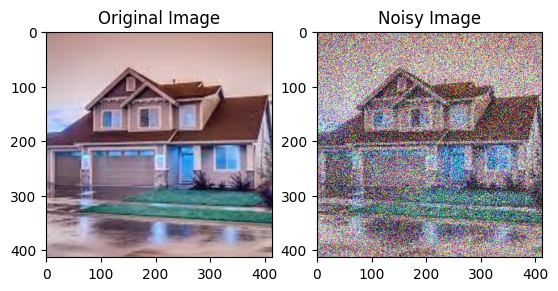

In [ ]:
im = cv2.imread('pic1.png')

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(im)

noise = np.random.normal(0, 120, (413, 413, 3))  # Using a smaller noise scale
noisy_image = im + noise
noise_img = np.clip(noisy_image, 0, 255).astype(np.uint8)

plt.subplot(1, 2, 2)
plt.title('Noisy Image')
plt.imshow(noise_img)

plt.show()


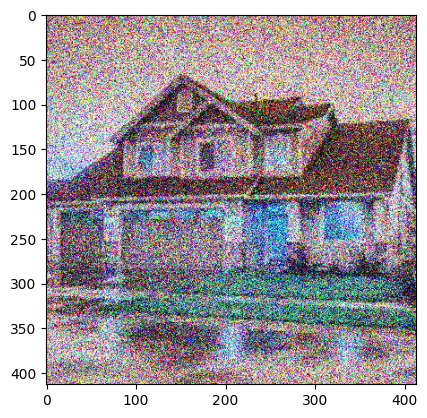

In [ ]:
im = cv2.imread('pic1.png')

noise=np.random.normal(0,100,(413,413,3))
noisy_img=im+noise

noisy_image=np.clip(noisy_img,0,255).astype(np.uint8)

plt.imshow(noisy_image)

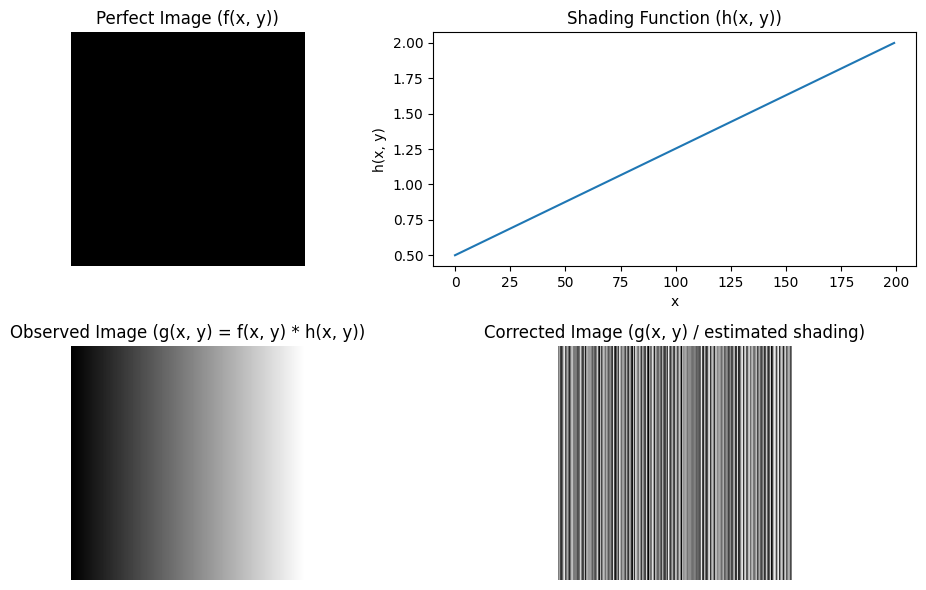

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a simple perfect image (f(x, y))
height, width = 200, 200
perfect_image = np.ones((height, width)) * 150

# Create a shading function (h(x, y))
shading_function = np.linspace(0.5, 2.0, width)

# Simulate observed image (g(x, y) = f(x, y) * h(x, y))
observed_image = perfect_image * shading_function

# Perform shading correction by dividing observed image by estimated shading function
estimated_shading_function = observed_image.mean(axis=0)
corrected_image = observed_image / estimated_shading_function

# Display the images
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.title("Perfect Image (f(x, y))")
plt.imshow(perfect_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Shading Function (h(x, y))")
plt.plot(shading_function)
plt.xlabel('x')
plt.ylabel('h(x, y)')

plt.subplot(2, 2, 3)
plt.title("Observed Image (g(x, y) = f(x, y) * h(x, y))")
plt.imshow(observed_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Corrected Image (g(x, y) / estimated shading)")
plt.imshow(corrected_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


(413, 413, 3)


(-0.5, 412.5, 412.5, -0.5)

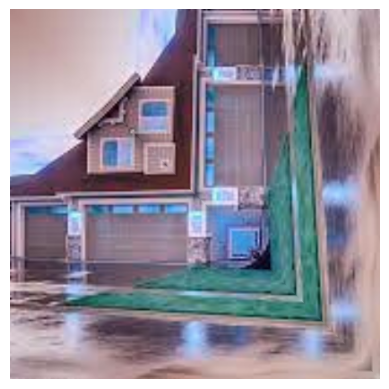

In [ ]:
#transpose
im=cv2.imread('pic1.png')
# im=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
dim=im.shape
print(dim)

for i in range(dim[0]):
    for j in range(dim[0]):
        im[i][j],im[j][i]=im[j][i],im[i][j]

plt.imshow(im)
plt.axis('off')

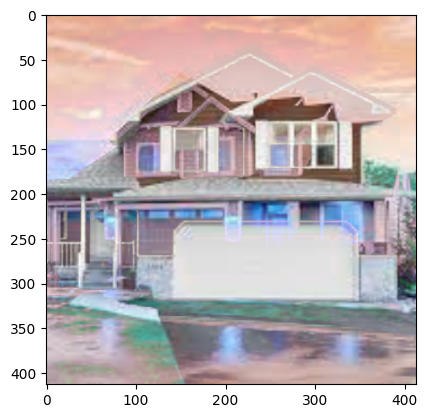

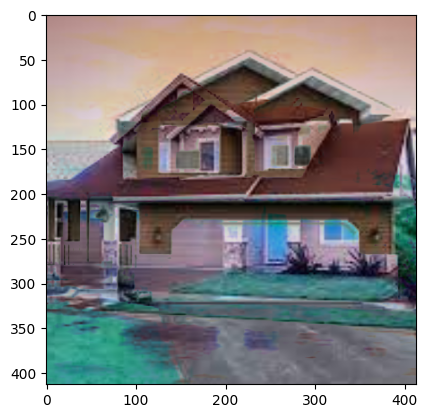

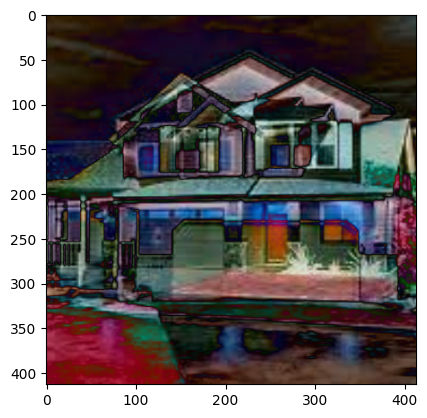

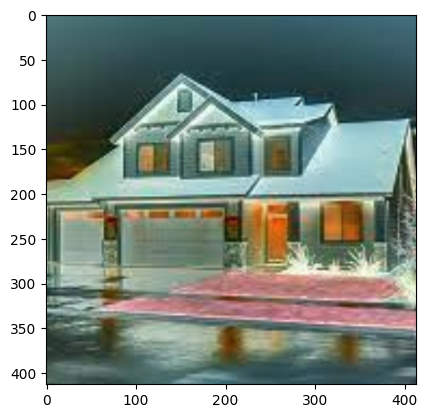

In [ ]:
im1=cv2.imread('pic1.png')
im2=cv2.imread('pic2.png')

union=cv2.max(im1,im2)

plt.imshow(union)
plt.show()

intersetion=cv2.min(im1,im2)

plt.imshow(intersetion)
plt.show()

difference=cv2.absdiff(im1,im2)

plt.imshow(difference)
plt.show()

complement=cv2.bitwise_not(im1,im2)

plt.imshow(complement)
plt.show()

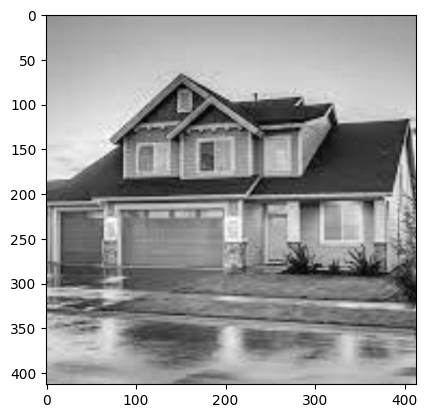

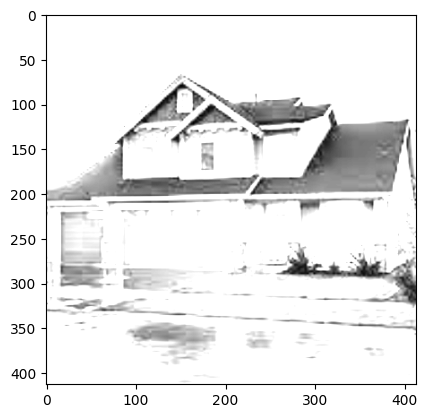

In [43]:
im1 = cv2.imread("pic1.png", cv2.IMREAD_GRAYSCALE)
scalar = 2.5 * im1
scalar = np.clip(scalar, 0, 255)
plt.imshow(im1, cmap="gray")
plt.show()
plt.imshow(scalar, cmap="gray")
plt.show()

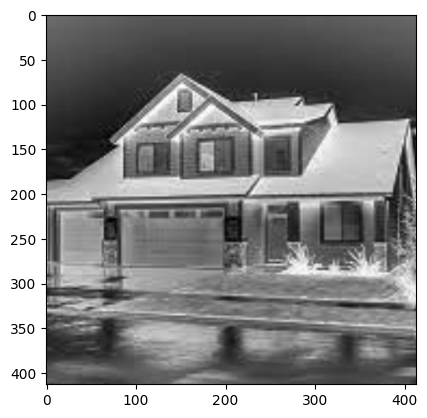

In [ ]:
#NEGATIVE OF AN IMAGE
bgr = cv2.imread("pic1.png")
original=cv2.cvtColor(bgr,cv2.COLOR_BGR2GRAY)

negative = 255 - original
plt.imshow(negative,cmap='gray')


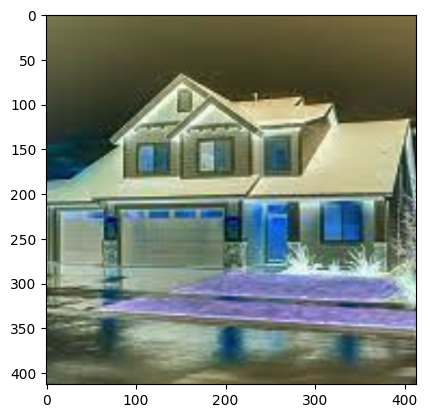

In [ ]:
#NEGATIVE OF AN RGB IMAGE
bgr = cv2.imread("pic1.png")
original=cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB)

negative = 255 - original
plt.imshow(negative)

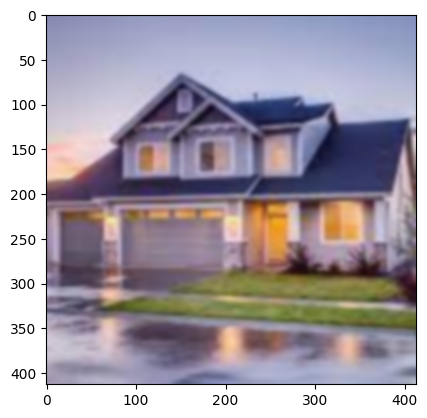

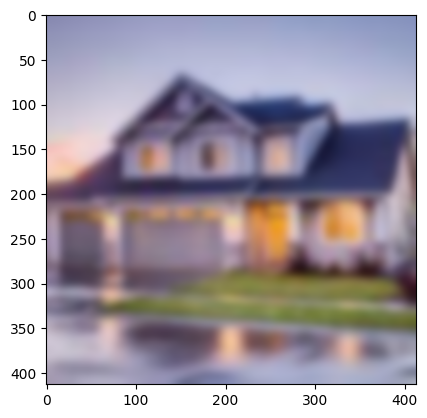

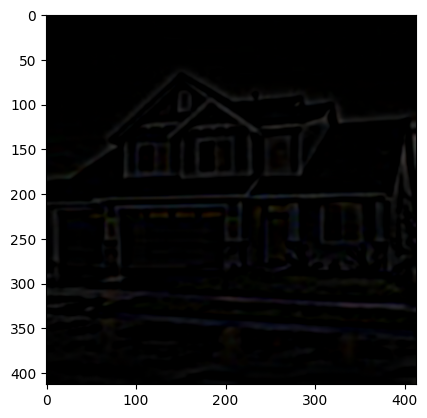

In [ ]:
blurred_image = cv2.GaussianBlur(original, (11, 11), 0)

plt.imshow(blurred_image)
plt.show()

blurred_image2 = cv2.GaussianBlur(original, (29, 29), 0)
plt.imshow(blurred_image2)
plt.show()

plt.imshow(cv2.subtract(blurred_image,blurred_image2))
plt.show()

(-0.5, 412.5, 412.5, -0.5)

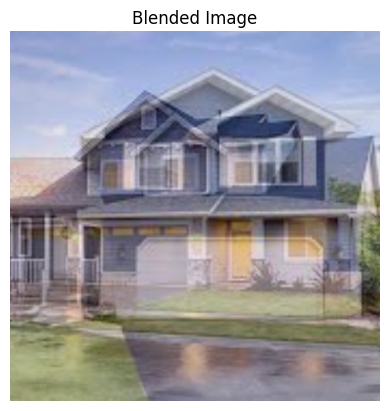

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load two images for blending
image1 = cv2.imread('pic1.png')
image2 = cv2.imread('pic2.png')

# Define the alpha value (transparency) for blending
alpha = 0.5

# Perform alpha blending
blended_image = cv2.addWeighted(image1, alpha, image2, 1 - alpha, 0)


plt.title('Blended Image')
plt.imshow(cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB))
plt.axis('off')



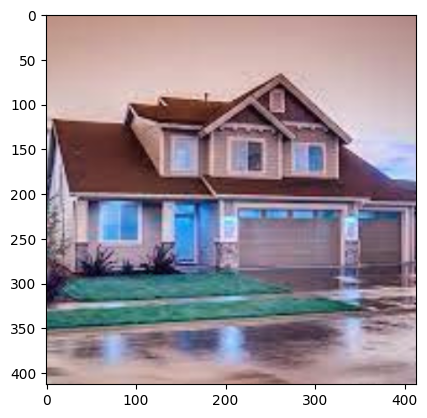

In [ ]:
flipped_img=cv2.flip(image1,1)
plt.imshow(flipped_img)

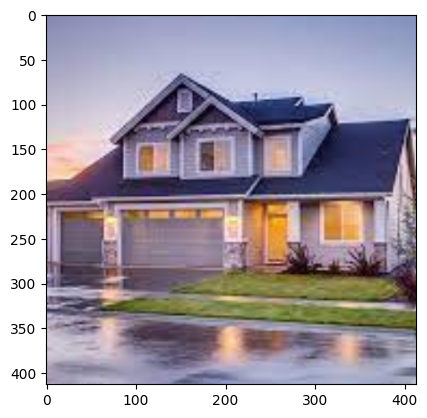

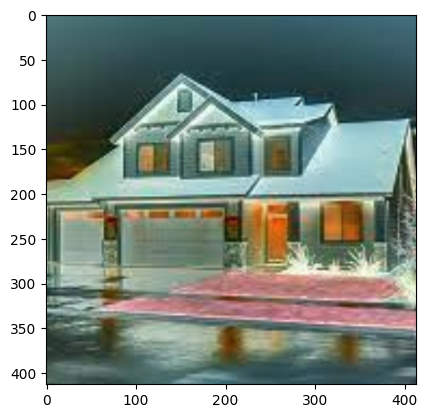

In [ ]:
#inverting an image
invert=cv2.bitwise_not(image1)

plt.imshow(original)
plt.show()
plt.imshow(invert)
plt.show()


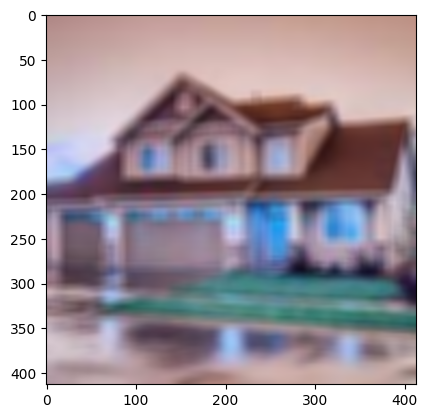

In [ ]:
#blur an image

blur=cv2.blur(image1,(12,12))
plt.imshow(blur)

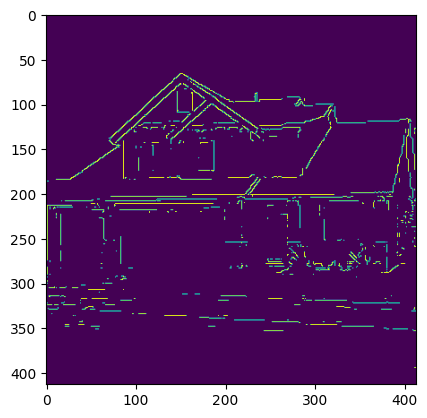

In [ ]:
img_edge = cv2.Canny(image1, 290, 290)
plt.imshow(img_edge)

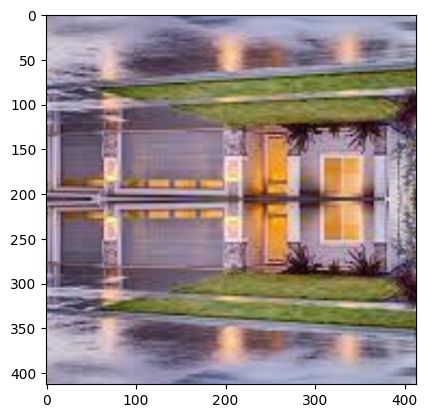

In [ ]:
for i in range(0,207):
        original[i],original[412-i]=original[412-i],original[i]

plt.imshow(original)

(0, 0)


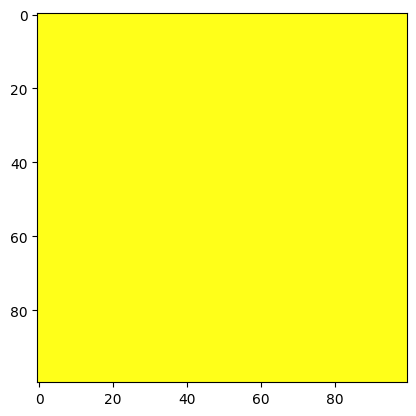

In [ ]:
im=np.zeros((100,100,3),dtype=np.uint8)
im[:,:]=[255,255,25]

plt.imshow(im)

_, max_val1, _, max_loc1 = cv2.minMaxLoc(cv2.cvtColor(im, cv2.COLOR_BGR2GRAY))
print(max_loc1)


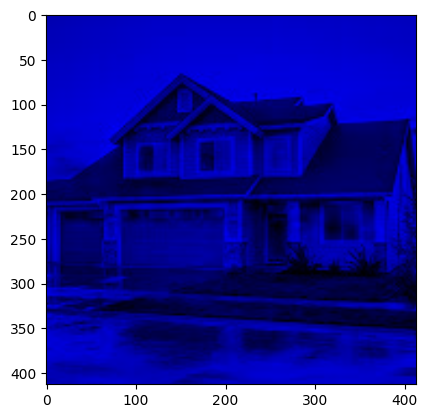

In [ ]:
#output only the blue channel
dummy=cv2.imread('pic1.png')
dummy=cv2.cvtColor(dummy,cv2.COLOR_BGR2RGB)
for i in range(0,413):
    for j in range(0,413):
        dummy[i][j][1]=0
        dummy[i][j][0]=0

plt.imshow(dummy)        

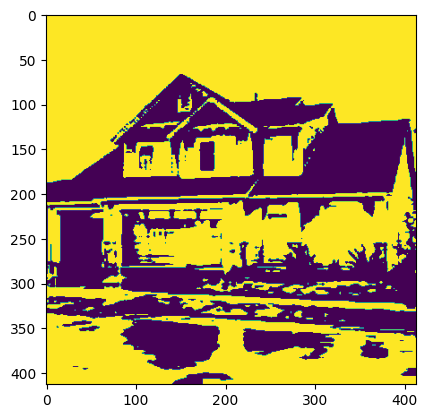

In [ ]:
import cv2

# Load a grayscale image
image = cv2.imread('pic1.png', cv2.IMREAD_GRAYSCALE)

# Apply binary thresholding
_, thresholded_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Display and save the result
plt.imshow(thresholded_image)


(-0.5, 1651.5, 825.5, -0.5)

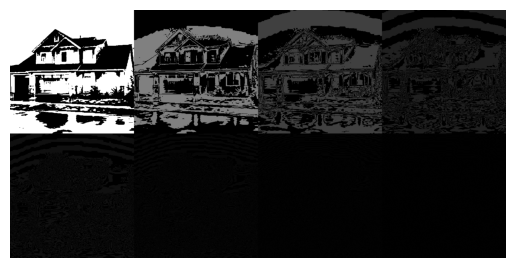

In [7]:
#bit plane slicing

import numpy as np
import cv2
import matplotlib.pyplot as plt
# Read the image in greyscale
img = cv2.imread("/home/dmacs/Desktop/MTech/104P/pic1.png", cv2.IMREAD_GRAYSCALE)

# Iterate over each pixel and change pixel value to binary using np.binary_repr() and store it in a list.
lst = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        lst.append(np.binary_repr(img[i][j], width=8))  # width = no. of bits

# We have a list of strings where each string represents binary pixel value. To extract bit planes 
# we need to iterate over the strings
# and store the characters corresponding to bit planes into lists.
# Multiply with 2^(n-1) and reshape to reconstruct the bit image.
eight_bit_img = (np.array([int(i[0]) for i in lst], dtype=np.uint8) * 128).reshape(
    img.shape[0], img.shape[1]
)
seven_bit_img = (np.array([int(i[1]) for i in lst], dtype=np.uint8) * 64).reshape(
    img.shape[0], img.shape[1]
)
six_bit_img = (np.array([int(i[2]) for i in lst], dtype=np.uint8) * 32).reshape(
    img.shape[0], img.shape[1]
)
five_bit_img = (np.array([int(i[3]) for i in lst], dtype=np.uint8) * 16).reshape(
    img.shape[0], img.shape[1]
)
four_bit_img = (np.array([int(i[4]) for i in lst], dtype=np.uint8) * 8).reshape(
    img.shape[0], img.shape[1]
)
three_bit_img = (np.array([int(i[5]) for i in lst], dtype=np.uint8) * 4).reshape(
    img.shape[0], img.shape[1]
)
two_bit_img = (np.array([int(i[6]) for i in lst], dtype=np.uint8) * 2).reshape(
    img.shape[0], img.shape[1]
)
one_bit_img = (np.array([int(i[7]) for i in lst], dtype=np.uint8) * 1).reshape(
    img.shape[0], img.shape[1]
)

# Concatenate these images for ease of display using cv2.hconcat()
finalr = cv2.hconcat([eight_bit_img, seven_bit_img, six_bit_img, five_bit_img])
finalv = cv2.hconcat([four_bit_img, three_bit_img, two_bit_img, one_bit_img])

# Vertically concatenate
final = cv2.vconcat([finalr, finalv])

plt.imshow(final,cmap='gray')
plt.axis('off')


In [3]:
import cv2
import numpy as np

# Load the bone scan image
image = cv2.imread("/home/dmacs/Desktop/MTech/104P/Images/DIP3E_CH03_Original_Images/Fig0343(a)(skeleton_orig).tif", cv2.IMREAD_GRAYSCALE)

# (b) Laplacian of (a)
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# (c) Sharpened image obtained by adding (a) and (b)
sharpened_image = cv2.add(image, laplacian)

# (d) Sobel gradient of image (a)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_gradient = np.sqrt(sobel_x**2 + sobel_y**2)

# Display or save the results
cv2.imshow("Original Image", image)
cv2.imshow("Laplacian of Image", laplacian)
cv2.imshow("Sharpened Image", sharpened_image)
cv2.imshow("Sobel Gradient", sobel_gradient)



error: OpenCV(4.8.0) /io/opencv/modules/core/src/arithm.cpp:672: error: (-5:Bad argument) When the input arrays in add/subtract/multiply/divide functions have different types, the output array type must be explicitly specified in function 'arithm_op'
